In [1]:
from __future__ import division, print_function
from builtins import input

import numpy as np
import sporco as sp

from sporco.dictlrn import cbpdndl
from sporco import util
# from sporco import signal
# from sporco import array
from sporco import plot
import matplotlib.pyplot as plt
plot.config_notebook_plotting()
import pandas as pd

In [2]:
data = pd.read_csv("/home/harry/Projects/ece657_proj/train_data_province.csv")

# data = data.sample(frac=1).values
data = data.values
image=[]
for i in range(data.shape[0]):
    i=data[i][0:-1].astype("float32")/255
    i=i.reshape(20,20)
    image.append(i)

S = np.dstack(image)
S.shape

(20, 20, 2223)

In [3]:
npd = 5
fltlmbd = 100

In [4]:
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

np.random.seed(12345)
D0 = np.random.randn(4, 4, 25)

lmbda = 0.2
opt = cbpdndl.ConvBPDNDictLearn.Options({'Verbose': True, 'MaxMainIter': 200,
                        'CBPDN': {'rho': 50.0*lmbda + 0.5},
                        'CCMOD': {'rho': 10.0, 'ZeroMean': True}},
                        dmethod='cns')
d = cbpdndl.ConvBPDNDictLearn(D0, sh, lmbda, opt, dmethod='cns')
D1 = d.solve()
print("ConvBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

2  1.00e+01
  11  3.05e+04  9.47e+03  1.05e+05  2.68e-07  2.72e-02  1.03e-01  1.05e+01  1.11e-02  2.72e-02  1.00e+01
  12  3.02e+04  9.33e+03  1.04e+05  3.01e-07  2.38e-02  9.57e-02  1.05e+01  9.52e-03  2.42e-02  1.00e+01
  13  2.99e+04  9.21e+03  1.03e+05  4.15e-07  2.12e-02  8.94e-02  1.05e+01  8.31e-03  2.16e-02  1.00e+01
  14  2.97e+04  9.11e+03  1.03e+05  4.01e-07  1.90e-02  8.40e-02  1.05e+01  7.34e-03  1.97e-02  1.00e+01
  15  2.95e+04  9.03e+03  1.02e+05  3.48e-07  1.73e-02  7.94e-02  1.05e+01  6.60e-03  1.79e-02  1.00e+01
  16  2.93e+04  8.96e+03  1.02e+05  3.05e-07  1.58e-02  7.53e-02  1.05e+01  5.97e-03  1.65e-02  1.00e+01
  17  2.92e+04  8.90e+03  1.01e+05  3.93e-07  1.47e-02  7.17e-02  1.05e+01  5.50e-03  1.53e-02  1.00e+01
  18  2.90e+04  8.84e+03  1.01e+05  2.74e-07  1.36e-02  6.84e-02  1.05e+01  5.08e-03  1.43e-02  1.00e+01
  19  2.89e+04  8.80e+03  1.01e+05  2.42e-07  1.28e-02  6.55e-02  1.05e+01  4.76e-03  1.34e-02  1.00e+01
  20  2.88e+04  8.76e+03  1.00e+05  3.69e-0

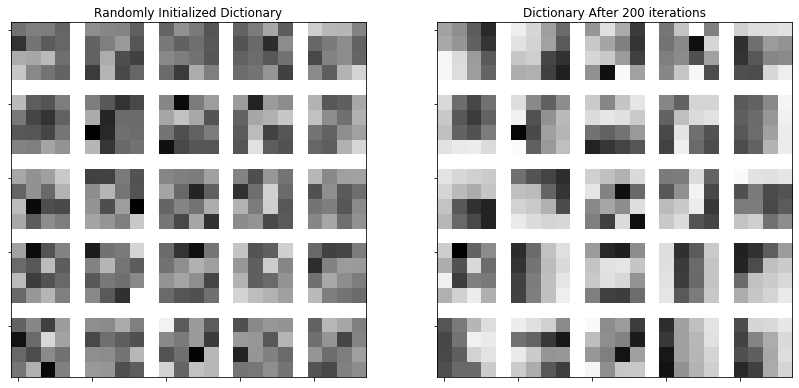

In [18]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='Randomly Initialized Dictionary', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='Dictionary After 200 iterations', fig=fig)
plot.savefig('./CBRPDN_Dict.png', bbox_inches = 'tight', dpi = 200)

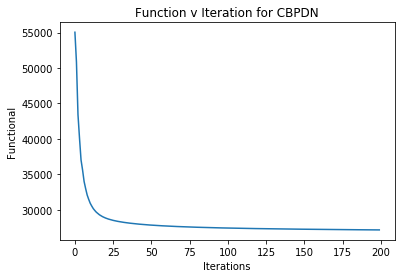

In [19]:
its = d.getitstat()
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', title = 'Function v Iteration for CBPDN')
plot.savefig('./CBRPDN_function_iter_plot.png', bbox_inches = 'tight', dpi = 200)

In [7]:
import pickle
with open("CBRPDN_Dict.obj", 'wb') as f:
    pickle.dump(D1, f)

In [8]:
import pickle
with open("CBRPDN_Dict.obj", 'rb') as f:
    D1 = pickle.load(f)

In [9]:
img = image[0]
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

In [10]:
from sporco.admm import cbpdn
lmbda = 5e-2
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                              'RelStopTol': 5e-3, 'AuxVarObj': False})

b = cbpdn.ConvBPDN(D1, sh, lmbda, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     r         s         ρ       
----------------------------------------------------------------
   0  5.68e+00  1.12e+00  9.13e+01  3.53e-01  1.28e+00  3.50e+00
   1  5.51e+00  1.01e+00  9.01e+01  2.37e-01  5.29e-01  3.50e+00
   2  5.94e+00  8.94e-01  1.01e+02  3.00e-01  3.11e-01  1.97e+00
   3  5.66e+00  8.64e-01  9.59e+01  2.50e-01  2.56e-01  1.62e+00
   4  5.54e+00  8.45e-01  9.39e+01  2.28e-01  1.66e-01  1.35e+00
   5  5.16e+00  8.41e-01  8.64e+01  1.76e-01  1.47e-01  1.35e+00
   6  4.94e+00  8.42e-01  8.20e+01  1.38e-01  1.16e-01  1.35e+00
   7  4.76e+00  8.39e-01  7.83e+01  1.08e-01  1.04e-01  1.35e+00
   8  4.70e+00  8.31e-01  7.73e+01  9.96e-02  9.35e-02  1.15e+00
   9  4.62e+00  8.26e-01  7.58e+01  9.19e-02  7.92e-02  9.97e-01
  10  4.50e+00  8.25e-01  7.35e+01  8.18e-02  6.81e-02  9.02e-01
  11  4.39e+00  8.25e-01  7.13e+01  6.69e-02  6.22e-02  9.02e-01
  12  4.36e+00  8.23e-01  7.08e+01  6.23e-02  5.72e-02  7.86e-01
  13  4.34e+00  8.20e-01 

In [11]:
import sporco.metric as sm
shr = b.reconstruct().squeeze()
imgr = sl[0] + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 25.03dB



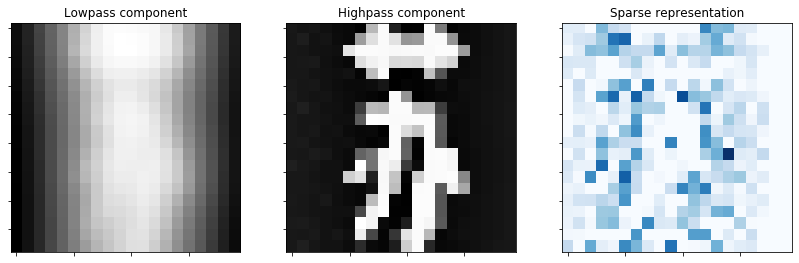

In [12]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 3, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(sh, title='Highpass component', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
plot.savefig('./CBRPDN_CSC_LHS_comp.png', bbox_inches = 'tight', dpi = 200)

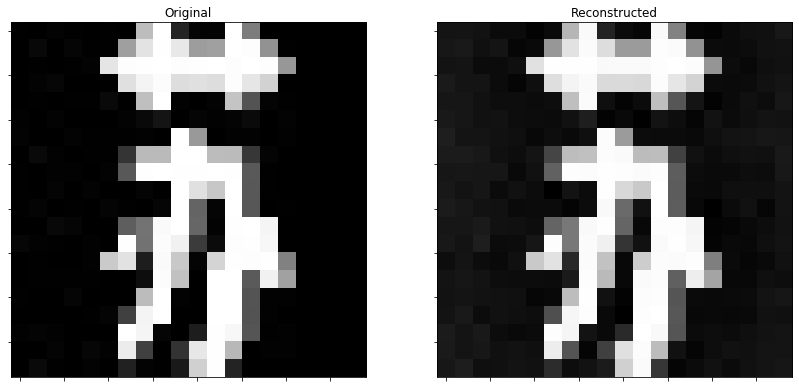

In [13]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
plot.savefig('./CBRPDN_CSC_recon.png', bbox_inches = 'tight', dpi = 200)

In [14]:
L = 1e2
opt = sp.fista.cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 250,
            'RelStopTol': 5e-3, 'L': L, 'BackTrack': {'Enabled': True }})

b = sp.fista.cbpdn.ConvBPDN(D1, sh, lmbda, opt, dimK=0)
X = b.solve()
print("FISTA ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt  L       
---------------------------------------------------------------------------------
   0  1.48e+01  1.37e+01  2.31e+01  1.53e-01  3.09e+03  3.99e+03      1  1.00e+02
   1  1.09e+01  9.07e+00  3.59e+01  4.77e-02  2.05e+03  2.40e+03      1  1.00e+02
   2  8.45e+00  6.08e+00  4.73e+01  1.78e-02  1.39e+03  1.54e+03      1  1.00e+02
   3  6.98e+00  4.12e+00  5.72e+01  7.75e-03  9.76e+02  1.04e+03      1  1.00e+02
   4  6.10e+00  2.83e+00  6.54e+01  3.62e-03  7.04e+02  7.36e+02      1  1.00e+02
---------------------------------------------------------------------------------
FISTA ConvBPDN solve time: 0.01s


In [15]:
from sporco.metric import psnr
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % psnr(img, imgr))

Reconstruction PSNR: 18.49dB



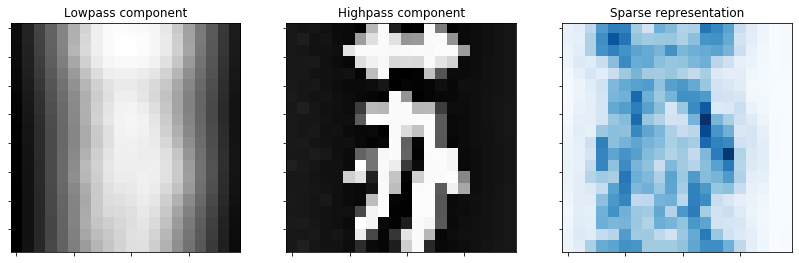

In [16]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 3, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 3, 2)
plot.imview(sh, title='Highpass component', fig=fig)
plot.subplot(1, 3, 3)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
plot.savefig('./CBRPDN_FISTA_LHS_comp.png', bbox_inches = 'tight', dpi = 200)

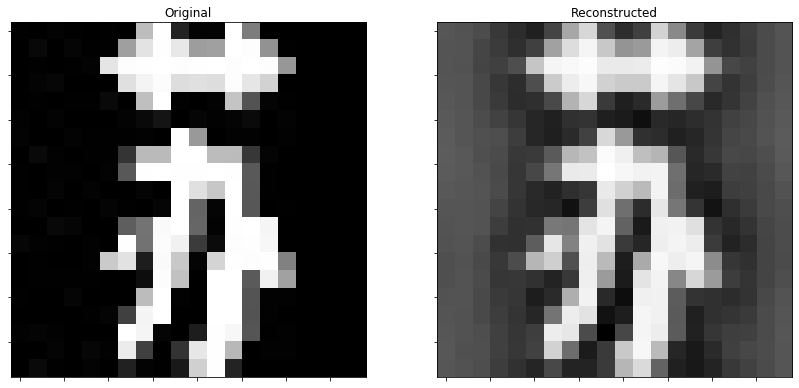

In [17]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
plot.savefig('./CBRPDN_FISTA_recon.png', bbox_inches = 'tight', dpi = 200)